# Métodos Computacionales


## Unidad 2: 

### Cálculo Numérico

1. Diferenciación numérica
2. Integración numérica




## Introducción.

A lo largo de esta sección, cubriremos el tema del cálculo numérico.  El cálculo es una herramienta muy poderosa y debido a la complejidad cada vez mayor de las expresiones analíticas utilizadas en física y astronomía, su uso se vuelve cada vez más poco práctico, y los enfoques numéricos son más que necesarios cuando se quiere profundizar. Este problema ha sido identificado desde hace mucho tiempo y se han desarrollado muchas técnicas numéricas cubriremos solo los esquemas más básicos, pero también proporcionaremos una base para enfoques más formales, para estas aproximaciones numericas se utiliza el concepto de cuadrícula numérica.

Una **cuadrícula numérica** es un conjunto de puntos espaciados uniformemente sobre el dominio de una función (es decir, la variable independiente), durante algún intervalo. El **espaciado** o **tamaño de paso** de una cuadrícula numérica es la distancia entre puntos adyacentes en la cuadrícula. Para el propósito de este texto, si $x$ es una cuadrícula numérica, entonces $x_j$ es el punto $j^{\mathrm{th}}$ en la cuadrícula numérica y $h$ es el espacio entre $x_{j -1}$ y $x_j$. La siguiente figura muestra un ejemplo de cuadrícula numérica.

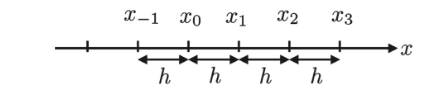


Hay varias funciones en Python que se pueden usar para generar cuadrículas numéricas. Para cuadrículas numéricas en una dimensión, es suficiente usar la función *linspace*, que ya ha usado para crear matrices espaciadas regularmente.

En Python, una función $f(x)$ se puede representar en un intervalo calculando su valor en una cuadrícula. Aunque la función en sí puede ser continua, esta representación **discreta** o **discretizada** es útil para cálculos numéricos y corresponde a conjuntos de datos que pueden adquirirse en la práctica de la ingeniería y la ciencia. Específicamente, el valor de la función solo puede conocerse en puntos discretos. Por ejemplo, un sensor de temperatura puede entregar pares de temperatura versus tiempo a intervalos de tiempo regulares. Aunque la temperatura es una función del tiempo suave y continua, el sensor solo proporciona valores a intervalos de tiempo discretos y, en este caso particular, ni siquiera se conocería la función subyacente.

Ya sea que $f$ sea una función analítica o una representación discreta de una, nos gustaría derivar métodos para aproximar la derivada de $f$ sobre una cuadrícula numérica y determinar su precisión.

## Diferenciación numérica

De acuerdo con la definición formal de diferenciación, dada una función $f(x)$ tal que $f(x)\in C^1[a,b]$ , la derivada de primer orden está dada por

$$\frac{d}{dx}f(x) = f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

Sin embargo, cuando exhibe una forma compleja o es una función numérica (solo se conoce un conjunto discreto de puntos), esta expresión se vuelve inviable. A pesar de esto, esta fórmula nos da una primera forma aproximada de calcular derivadas numéricas tomando un intervalo finito , $h$ es decir



$$f'(x) \approx \frac{f(x+h)-f(x)}{h}$$


donde la función debe conocerse al menos en $x_0$  y  $x_1 = x_0+h$, graficamente:

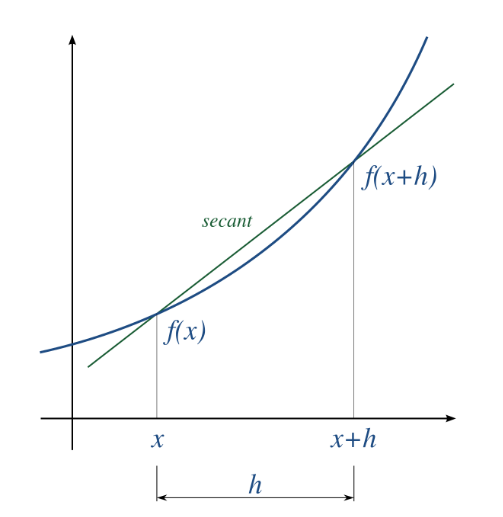

Si tomamos $h$ lo suficientemente pequeña, entonces podemos aproximar esta recta secante a la recta tangente en un punto y así obtenemos la pendiente de dicha recta.

Hay varias fórmulas de diferencias finitas utilizadas en diferentes aplicaciones, y tres de ellas, donde la derivada se calcula utilizando los valores de dos puntos, se presentan a continuación.

La **diferencia hacia adelante** es estimar la pendiente de la función en $ x_j $ usando la línea que conecta $ (x_j, f (x_j)) $ y $ (x_ {j + 1}, f (x_ {j + 1})) $:

$$ f '(x_j) = \frac{f (x_{j + 1}) - f (x_j)}{x_{j+1} -x_j} $$

La **diferencia hacia atrás** es estimar la pendiente de la función en $ x_j $ usando la línea que conecta $ (x_ {j-1}, f (x_ {j-1})) $ y $ (x_j, f (x_j)) $:

$$ f '(x_j) = \frac{f (x_j) - f (x_{j-1})} {x_j - x_{j-1}} $$

La **diferencia central** es estimar la pendiente de la función en $ x_j $ usando la línea que conecta $ (x_ {j-1}, f (x_ {j-1})) $ y $ (x_ {j +1}, f (x_ {j + 1})) $:

$$ f '(x_j) = \frac{f (x_{j + 1}) - f (x_{j-1})} {x_{j + 1} - x_{j-1}} $$

La siguiente figura ilustra los tres tipos diferentes de fórmulas para estimar la pendiente.

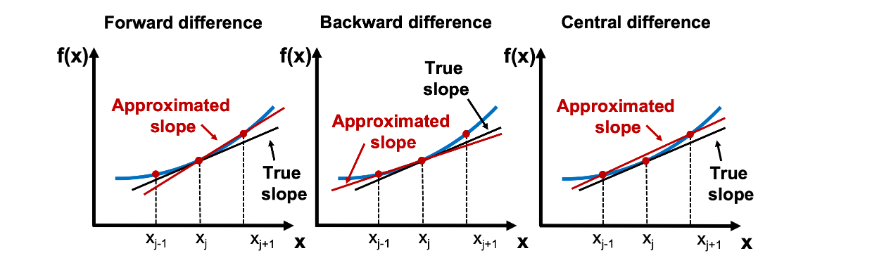

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
 def derivative(f,a,method='centrada',h=1e-1):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atras':
        return (f(a) - f(a - h))/h 
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atrás'.")

### Ejemplo

$$f(x) =e^{\sin(x)}$$

$$\frac{d}{dx} e^{\sin(x)} = cos(x)e^{sin(x)} $$



In [9]:
def e(x): #f(x)
    return np.exp(np.sin(x))

def de(x): #f'(x)
    return np.cos(x)*np.exp(np.sin(x))

$$x=0 \qquad \rightarrow \quad cos(0)e^{sin(0)} = 1 e^{0} = 1$$

In [10]:
derivative(e,0),de(0)

(0.9999933444461767, 1.0)

$$x= \pi \qquad \rightarrow \quad cos(\pi)e^{sin(\pi)}= -1 e^0= -1$$


In [11]:
derivative(e,np.pi),de(np.pi)

(-0.9999933444461778, -1.0000000000000002)

### Dominios de los métodos

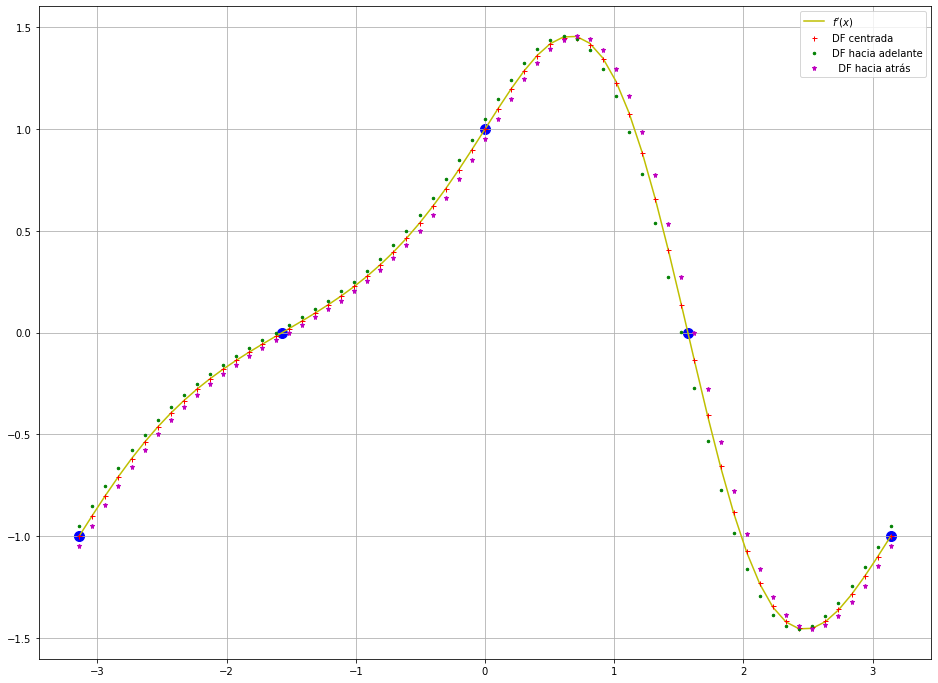

In [15]:
a=-np.pi 
b=np.pi 
h=0.1 #tamaño del paso 
N=round((b-a)/h) #redondear el resultado, el cual será la cantidad de datos
x = np.linspace(a,b,N)

de_c=derivative(e,x)
de_ad=derivative(e,x,method='adelante')
de_at=derivative(e,x,method='atrás')

puntos=np.array([-np.pi,-np.pi/2,0,np.pi/2,np.pi])
y_puntos=derivative(e,puntos)

plt.figure(figsize = (16, 12)) #tamaño del plot

plt.plot(x,de(x), 'y') #derivada  analítica
#Utilizamos h=0.1 solo con fines de visualización
plt.plot(x,de_c,'r+', ms=5) #centrada por defecto 
plt.plot(x,de_ad,'g.', ms=5) #adelante
plt.plot(x,de_at,'m* ', ms=5) #atrás

plt.grid()

plt.scatter(puntos,y_puntos, s= 100.,c='b') # s: tamaño del punto, c: color 'b'=blue

plt.legend(["$f'(x)$",'DF centrada','DF hacia adelante','  DF hacia atrás'])

In [1]:
plt.figure(figsize = (16, 12)) #tamaño del plot

#Errores absolutos
c_err=de(x)-de_c
ad_err=de(x)-de_ad
at_err=de(x)-de_at

plt.plot(x,de(x), 'y') #solución analítica
#Utilizamos h=0.1 solo con fines de visualización
plt.plot(x,c_err)#,'r+', ms=5) #centrada por defecto 
plt.plot(x,ad_err)#,'g.', ms=5) #adelante
plt.plot(x,at_err)#,'m* ', ms=5) #atrás
plt.legend(['DF centrada','DF hacia adelante','  DF hacia atrás'])
plt.title('Errores de truncamiento para distintas DFs')
plt.ylabel('$O(h^2)$')
plt.xlabel('θ')
plt.grid()
plt.show()

NameError: name 'plt' is not defined

### Aproximada de derivadas con series de Taylor y derivadas de orden superiror

Para obtener una aproximación de la derivada de $ f $, volvemos a la serie de Taylor. Para una función arbitraria $ f (x) $ la serie de Taylor de $ f $ alrededor de $ a = x_j $ es
$$
f(x) = \frac{f(x_j)(x - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x - x_j)^1}{1!} + \frac{f''(x_j)(x - x_j)^2}{2!} + \frac{f'''(x_j)(x - x_j)^3}{3!} + \cdots.
$$


Si $ x $ está en una cuadrícula de puntos con espaciado $ h $, podemos calcular la serie de Taylor en $ x = x_{j + 1} $ para obtener

$$
f(x_{j+1}) = \frac{f(x_j)(x_{j+1} - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x_{j+1}- x_j)^1}{1!} + \frac{f''(x_j)(x_{j+1} - x_j)^2}{2!} + \frac{f'''(x_j)(x_{j+1} - x_j)^3}{3!} + \cdots.
$$

Sustituyendo $ h = x_{j + 1} - x_j $ y despejando $ f^{\prime}(x_j) $ da la ecuación

$$
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + \left(-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots\right).
$$

Los términos que están entre paréntesis, $-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots$, se llaman **condiciones de pedido más altas** de $ h $. Los términos de orden superior se pueden reescribir como

$$
-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots = h(\alpha + \epsilon(h)),
$$

donde $\alpha$ es una constante, y $ \epsilon (h) $ es una función de $ h $ que va a cero cuando $ h $ va a 0. Puedes verificar con algo de álgebra que esto sea cierto. Usamos la abreviatura "$ O (h) $" para $h(\alpha + \epsilon(h))$, y en general, usamos la abreviatura "$ O(h^p) $" para denotar $ h^p(\alpha + \epsilon (h)) $.


Sustituyendo $ O (h) $ en las ecuaciones anteriores se obtiene

$$
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + O(h).
$$

Esto da la fórmula de **DF hacia adelante** para aproximar derivados como

$$
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h},
$$

y decimos que esta fórmula es $ O (h) $, de la misma forma podemos hacer lo mismo para las otras dos ecuaciones. 

También es posible utilizar la serie de Taylor para aproximar derivadas de orden superior (por ejemplo, $ f '' (x_j), f '' '(x_j) $, etc.). Por ejemplo, tomando la serie de Taylor alrededor de $ a = x_j $ y luego calculándola en $x = x_{j-1} $ y $ x_{j + 1} $ da

$$
f (x_{j-1}) = f (x_j) - hf ^ {\prime} (x_j) + \frac{h^2f '' (x_j)} {2} - \frac{h ^ 3f '' ' (x_j)}{6} + \cdots $$

y

$$ f (x_ {j + 1}) = f(x_j) + hf^{\prime}(x_j) + \frac{h ^ 2f '' (x_j)}{2} + \frac{h^3f ' '' (x_j)}{6} + \cdots. $$

Si sumamos estas dos ecuaciones, obtenemos

$$ f (x_{j-1}) + f (x_{j + 1}) = 2f (x_j) + h ^ 2f '' (x_j) + \frac{h ^ 4f '' '' (x_j)}{24} + \cdots, $$

y con alguna reordenación da la aproximación
$$ f '' (x_j) \approx \frac{f (x_ {j + 1}) - 2f (x_j) + f (x_ {j-1})}{h^2}, $$

y es $ O (h ^ 2) $.

In [17]:
from scipy.misc import derivative as deriv

#n: orden de la derivada, order: orden de la aproximación por Serie de  Taylor
print('derivative: ', derivative(e,0)  ,'|  derivative SciPy',deriv(e,0,dx=0.1))#,n=1,order=9)) 

derivative:  0.9999933444461767 |  derivative SciPy 0.9999933444461767


Text(0.5, 1.0, 'Derivadas de orden superior')

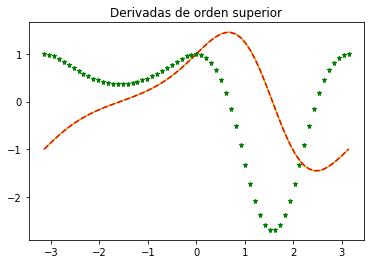

In [19]:
plt.plot(x,de(x),'y') #primera derivada artesanal
plt.plot(x,deriv(e,x,dx=0.1,order=3),'r--',ms=5) # Primera derivada libreria
plt.plot(x,deriv(e,x,dx=0.1,n=2,order=3),'g*',ms=5) # segunda derivada libreria
plt.title('Derivadas de orden superior')

## Integración numérica

La integración es el segundo concepto fundamental de cálculo (junto con la diferenciación). Los enfoques numéricos son generalmente más útiles aquí que en la diferenciación ya que el procedimiento antiderivado (analíticamente) es a menudo mucho más complejo, o incluso imposible. En esta sección cubriremos algunos esquemas básicos, incluidas las cuadraturas numéricas.

Geométricamente, la integración puede entenderse como el área debajo de una función dentro de un intervalo dado. Formalmente, dada una función $f\in C^{1}[a,b]$,   antiderivada se define como

$$F(x) = \int f(x) dx$$

válido para todas las en $[a,b]$. Sin embargo, una expresión más útil es una integral definida, donde la antiderivada se evalúa dentro de cierto intervalo, es decir

$$F(x_1) - F(x_0) = \int_{x_0}^{x_1} f(x) dx$$

Este procedimiento puede considerarse formalmente como una generalización de suma ponderada discreta. Esta idea se explotará a continuación y nos llevará a algunas primeras aproximaciones a la integración.

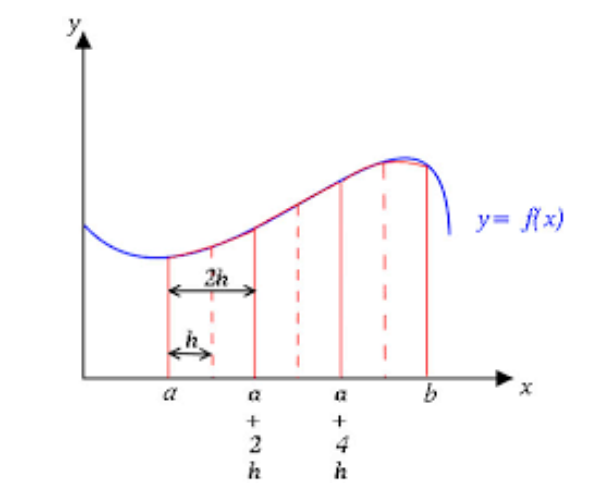

$$\int_a^b f(x)\,dx = \int_{x_0}^{x_1} f(x)dx + \int_{x_1}^{x_2} f(x)dx + \ldots + \int_{x_{n-1}}^{x_n} f(x)dx,     \nonumber  $$

$$\approx h f\left(\frac{x_0 + x_1}{2}\right) + h f\left(\frac{x_1 + x_2}{2}\right) + \ldots +h f\left(\frac{x_{n-1} + x_n}{2}\right) ,$$
  

$$\approx h \left(f\left(\frac{x_0 + x_1}{2}\right) +f\left(\frac{x_1 + x_2}{2}\right) + \ldots + f\left(\frac{x_{n-1} + x_n}{2}\right)\right)\thinspace $$


### Cuadratura numérica

Los métodos de cuadratura en esta sección se basan en los polinomios de interpolación y nos dice que dada una función de buen comportamiento $ f (x) $, un teorema anterior garantiza que

$$f(x) = \sum_{k = 0} ^ nf (x_k) L_{n, k} (x) + \frac{(x-x_0) (x-x_1) \cdots (x-x_n)} {(n + 1)!} f^{(n + 1)} (\xi (x))$$

con $ L_{n, k} (x)$ las funciones básicas de lagrange. Integrando $f(x)$ sobre $[a, b]$, obtenemos la siguiente expresión:

$$ \int_a^bf (x) dx =\int_a ^ b \sum_{k = 0} ^ nf (x_k) L_{n, k} (x) dx + \int_a ^ b \frac{(x-x_0) (x-x_1) \cdots (x-x_n)} {(n + 1)!} f^{(n + 1)}(\ xi (x)) dx$$

Vale la pena mencionar que esta expresión es un número, a diferencia de la diferenciación donde obtuvimos una función.

Podemos convertir fácilmente esta expresión en una suma ponderada como

$$\int_a^b f (x) dx = \sum_{k = 0}^n a_i f(x_k) + \frac{1} {(n + 1)!} \int_a^b f^{(n + 1)} (\xi(x)) \prod_ {k = 0}^{n} (x-x_k) dx $$

donde cada coeficiente se define como:

$$ a_i = \int_a^b L_{n, k} (x) dx = \int_a ^ b \prod_{j = 0,\neq k} ^ {n} \frac {(x-x_j)} { (x_k-x_j)} dx $$
para cada $i = 0,1,\dots,n.$


Finalmente, la fórmula de cuadratura o **fórmula de Newton-Cotes** viene dada por la siguiente expresión:

$$ \int_a ^ b f (x) dx = \sum a_i f (x_i) + E [f] $$

o de forma aproximada: 

$$\int_a^b f(x)dx \approx \sum_{i=0}^na_if(x_i)$$


donde el error estimado es

$$ E [f] = \frac {1} {(n + 1)!} \int_a ^ bf ^ {(n + 1)} (\xi(x)) \prod_{k = 0} ^ {n} (x-x_k) dx $$

Asumiendo además de intervalos igualmente espaciados de modo que $ x_i = x_0 + i \ times h $, la fórmula del error se convierte en:

$$ E [f] = \frac{h ^ {n + 3} f ^ {n + 2} (\ xi)} {(n + 1)!} \int_0 ^ nt ^ 2 (t-1) \cdots (tn) $$

si $ n $ es par y

$$ E [f] = \frac {h ^ {n + 2} f ^ {n + 1} (\ xi)} {(n + 1)!} \int_0 ^ nt (t-1) \cdots (tn ) $$

si $ n $ es impar.

#### Regla trapezoidal

Usando la fórmula anterior, es fácil derivar un conjunto de aproximaciones de bajo orden para la integración. Asumiendo una función $ f (x) $ y un intervalo $ [x_0, x_1] $, la fórmula de cuadratura asociada es la obtenida de un polinomio de Lagrange de primer orden $ P_1 (x) $ dado por:

$$P_1(x) = \frac{(x-x_1)}{x_0-x_1}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)$$

Usando esto, es legible obtener la integral:

$$\int_{x_0}^{x_1}f(x)dx = \frac{h}{2}[ f(x_0) + f(x_1) ]-\frac{h^3}{12}f^{''}(\xi)$$

con $\xi \in [x_0, x_1]$ and $h = x_1-x_0$.

Esto recibe el nombre de regla trapezoidal porque cuando $f$ es una función con valores positivos, la integral se aproxima mediante el área de un trapecio, como se muestra en el siguiente esquema


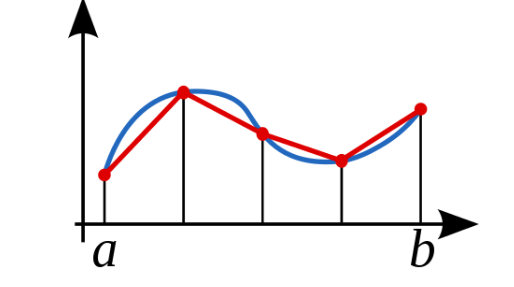

El término de error para la regla trapezoidal implica $f''$, por lo que la regla da el resultado
exacto cuando se aplica a cualquier función cuya segunda derivada es idénticamente cero, es
decir, cualquier polinomio de grado uno o menos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def trap(f,a,b,n):
    h = 1 / float(n)
    intgr =0
    for i in range(1, int(n)):
        intgr+= 0.5 * h * (f(a+(i-1)*h) + f(a+i*h))

    #error_trapecio = (b-a)*(h^2)/12
    return intgr

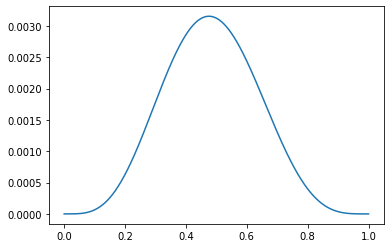

In [4]:
a=0
b=1
h=1e-4
N=(b-a)/h
#the function to be integrated:
def f(x):
    return x**4 * (1 - x)**4 / (1 + x**2)

x=np.linspace(a,b,int(N))
plt.plot(x,f(x))

In [20]:
print(trap(f,a,b,100))

0.0012644892431151941


In [14]:
np.trapz(f(x),dx=h) #comprobando con el trapecio de NumPy

0.0012643628184228837

In [21]:
n_l=[]#n's_list
t_l=[]#trapz_list
print('    n        trapecio')
for i in range(1, 21):
    n = 2**i
    t = trap(f, a, b, n)
    t_l.append(t)
    n_l.append(n)
    print('%7d %.16f' % (n, t))

    n        trapecio
      2 0.0007812500000000
      4 0.0011709415211397
      8 0.0012595066581814
     16 0.0012642945258117
     32 0.0012644825173994
     64 0.0012644890456084
    128 0.0012644892602480
    256 0.0012644892671250
    512 0.0012644892673426
   1024 0.0012644892673494
   2048 0.0012644892673496
   4096 0.0012644892673496
   8192 0.0012644892673496
  16384 0.0012644892673496
  32768 0.0012644892673496
  65536 0.0012644892673496
 131072 0.0012644892673496
 262144 0.0012644892673496
 524288 0.0012644892673496
1048576 0.0012644892673497


#### La regla de Simpson

La regla de Simpson resulta de la integración sobre $[a,b]$ del segundo polinomio de Lagrange con nodos igualmente espaciados.

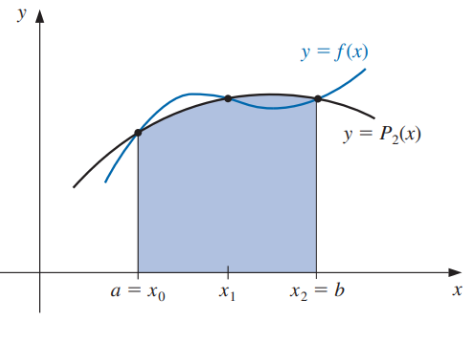

El cual resulta en dos formas de métodos: **Regla  de Simpson 1/3** y **3/8**.

##### **Regla de Simpson 1/3**

Una aproximación ligeramente mejor a la integración es la regla de Simpson. Para esto, asuma una función $ f (x) $ y un intervalo $ [x_0, x_2] $, con un punto intermedio $ x_1 $. El polinomio de Lagrange de segundo orden asociado está dado por:

$$P_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)$$

La expresion final entonces:
    
$$\int_{x_0}^{x_2} f(x)dx = \frac{h}{3}[ f(x_0)+4f(x_1)+f(x_2) ]-\frac{h^5}{90}f^{(4)}(\xi)$$
$x_0=a$,$x_2=b$, y $x_1=a+h$, en donde $h=(b-a)/n$

El término de error en la regla de Simpson implica la cuarta derivada de $f$, por lo que da
resultados exactos cuando se aplica a cualquier polinomio de grado tres o menos

In [25]:
def simpson1_3(f, a, b, n):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = 0.0
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la x
        #x: valores entre [a,b] espaciados por h
        x = a + i * h
        # si es par se multiplica por 4
        if(i % 2 == 0): # i%2 : evalúa si "i" es divisible entre 2 el resultado es 0 (residuo de la división)
            suma = suma + 2 * f(x)
            #o
            #suma += 2* f(x,f)
        #en caso contrario se multiplica por 2
        else:
            suma = suma + 4 * f(x)
    #sumamos los el primer elemento y el ultimo
    suma = suma + f(a) + f(b)
    #Multiplicamos por h/3
    area = suma * (h / 3)

    #error_simpson1 = (h^5)/90
    #Retornamos el resultado
    return area

Área: 2.0536301324701354


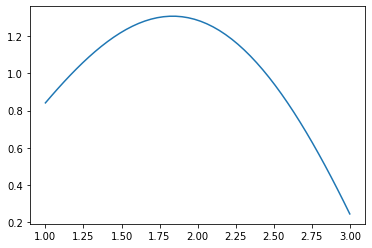

In [26]:
# Integración: Regla Simpson 1/3
import numpy as np
import matplotlib.pyplot as plt

# INGRESO:
def f(x):
    return np.sqrt(x)*np.sin(x)

# intervalo de integración [a,b] con  n pasos
a = 1
b = 3

n = 50

print('Área:',simpson1_3(f,a,b,n))
x=np.linspace(a,b,n)
plt.plot(x,f(x))

In [27]:
s13_l=[]#trapz_list
print('      n        s13')
for i in range(1, 21):
    n = 2**i
    s13 = simpson1_3(f, a, b, n)
    s13_l.append(s13)
    print('%7d %.16f' % (n, s13))

      n        s13
      2 2.0765536739078203
      4 2.0549261957703937
      8 2.0537093830617339
     16 2.0536350132810970
     32 2.0536303887412357
     64 2.0536301000609343
    128 2.0536300820238713
    256 2.0536300808966383
    512 2.0536300808261894
   1024 2.0536300808217902
   2048 2.0536300808215113
   4096 2.0536300808214878
   8192 2.0536300808214918
  16384 2.0536300808214918
  32768 2.0536300808214745
  65536 2.0536300808215007
 131072 2.0536300808215189
 262144 2.0536300808215286
 524288 2.0536300808214101
1048576 2.0536300808215957


##### **Regla de Simpson 3/8**

Es el resultado cuando para el integral se utiliza el resultado de una interpolación con polinomio de tercer grado.

$$\int_a^bf(x)dx=\frac{3h}{8}[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)] - \frac{3}{80}h^5f^{(4)}(z)$$

Donde $f^{(4)}(z) = \frac{d^4f}{dz^4}$.

In [ ]:
def simpson3_8(f, a, b, n):
    #calculamos h
    h = (b - a) / n
    #Inicializamos nuestra varible donde se almacenara las sumas
    suma = f(a)+f(b)
    #hacemos un ciclo para ir sumando las areas
    for i in range(1, n):
        #calculamos la k
        #k = a - h + (2 * h * i)
        k = a + i * h

        if (i % 3 == 0): # i%3 : evalúa si "i" es divisible entre 3 el resultado es 0 (residuo de la división)
          suma += 2 * f(k)

        #en caso contrario se multiplica por 3
        else:
          suma += 3*f(k)
              
    #Multiplicamos por 3h/8
    area = suma * 3*(h / 8)

    #error_simpson2 = (b-a)*(h^4)/180
    #Retornamos el resultado
    return area

In [ ]:
 Integración: Regla Simpson 3/8
import numpy as np
import matplotlib.pyplot as plt

# INGRESO:
def f2(x):
  return np.exp(x)#*np.sin(x)

# intervalo de integración [a,b] con  n pasos
a = 1
b = 3

n = 60

print('Área:',simpson1_3(f2,a,b,n),simpson3_8(f2,a,b,n))
x=np.linspace(a,b,n)
plt.plot(x,f2(x))

In [ ]:
s38_l=[]#simpson3/8_list
print('      n        trapecio')
for i in range(1, 21):
    n = 2**i
    s38 = simpson3_8(f, a, b, n)
    s38_l.append(s38)
    print('%7d %.16f' % (n, s38))

### Integrando con SciPy

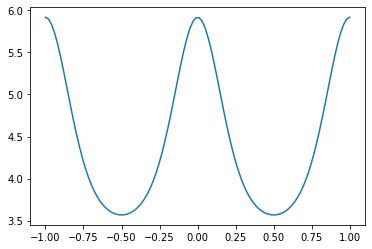

In [24]:
from scipy.integrate import quad

def f(x):
    return np.exp(np.cos(-2 * x * np.pi)) + 3.2
x=np.linspace(-1,1,100)
plt.plot(x,f(x))

In [25]:
res, err = quad(f, -2, 2) #devuelve respuesta y error

print("El resultado numérico es {}, con un error de {}"
    .format(res, err))

El resultado numérico es 17.864263511008033, con un error de 1.5511700537796237e-11


### Actividad

La distribución de Fermi-Dirac (FD) describe la probabilidad de encontrar una partícula cuántica con spin semi-entero $(1/2,3/2,...)$ en el estado de energía E:

$$f_{FD}=\frac{1}{e^{(E-\mu)/kT}+1}$$

El $\mu$ en la distribución de FD es llamado la **energía de Fermi**, y en este caso queremos ajustar $\mu$, tal que la probabilidad de hallar una partícula en punto sea exactamente 1.

$$\int_{E_{min}}^{E_{max}}f_{FD}dE=1$$

Imagine un sistema cuántico a temperatura ambiente donde, por alguna razón, la energía E está limitada a estar entre 0 y 2 eV. ¿Cuál sería el $\mu$ en este caso?